# Figure 1
Notebook with data, preprocsesing and plotting of the Figure 1 panels

### Figure 1A

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Data loading and preprocessing

In [2]:
# Load the dataset
file_path = 'data/Tegel.proteins.dt.csv'  # Adjust the path if necessary
protein_data = pd.read_csv(file_path)

# Replace NaN values in the "Protein.amount..µg." column with 0
protein_data["Protein.amount..µg."] = protein_data["Protein.amount..µg."].fillna(0)

# Extract the relevant column
updated_protein_amounts = protein_data["Protein.amount..µg."]

# Calculate cumulative frequency
sorted_updated_amounts = np.sort(updated_protein_amounts)
updated_cumulative_freq = np.arange(1, len(sorted_updated_amounts) + 1) / len(sorted_updated_amounts) * 100

# Calculate the percentage of proteins with a value of 0
zero_percentage = (updated_protein_amounts == 0).sum() / len(updated_protein_amounts) * 100

#### Option 1

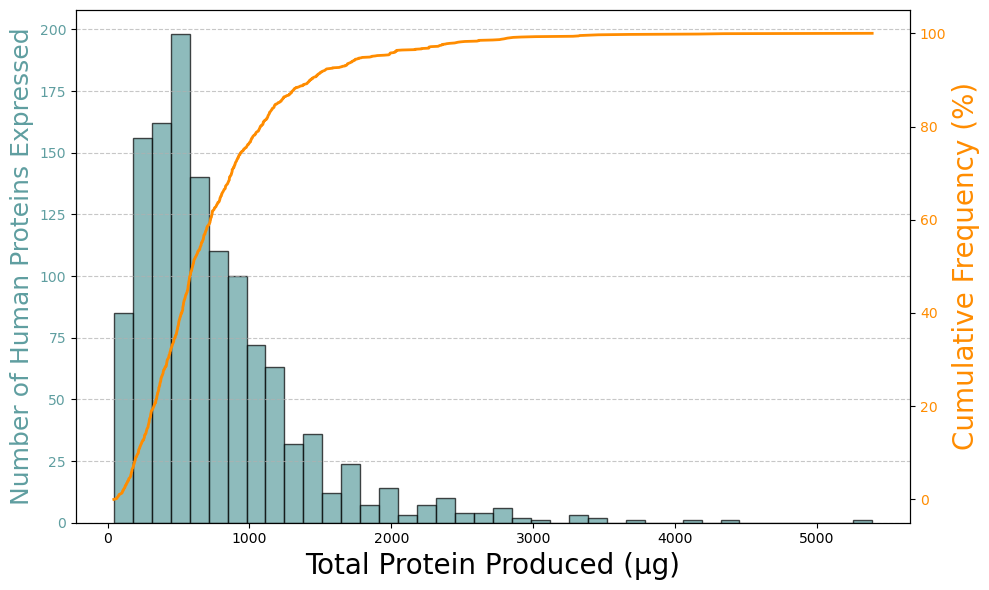

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Remove zero values
non_zeros = updated_protein_amounts[updated_protein_amounts > 0]

# Calculate cumulative frequency
sorted_non_zeros = np.sort(non_zeros)
updated_cumulative_freq = np.linspace(0, 100, len(sorted_non_zeros))

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Histogram
color_hist = 'cadetblue'
ax1.hist(non_zeros, bins=40, edgecolor='black', alpha=0.7, color=color_hist, label='Histogram')
ax1.set_xlabel("Total Protein Produced (µg)", fontsize=20)
ax1.set_ylabel("Number of Human Proteins Expressed", color=color_hist, fontsize=18)
ax1.tick_params(axis='y', labelcolor=color_hist)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Cumulative frequency
ax2 = ax1.twinx()
color_cumul = 'darkorange'
ax2.plot(sorted_non_zeros, updated_cumulative_freq, color=color_cumul, label='Cumulative Frequency', linewidth=2)
ax2.set_ylabel("Cumulative Frequency (%)", color=color_cumul, fontsize=20)
ax2.tick_params(axis='y', labelcolor=color_cumul)

# Adjust layout
fig.tight_layout()

plt.savefig('results/Figure_1_option1.png')
plt.show()


#### Option 2

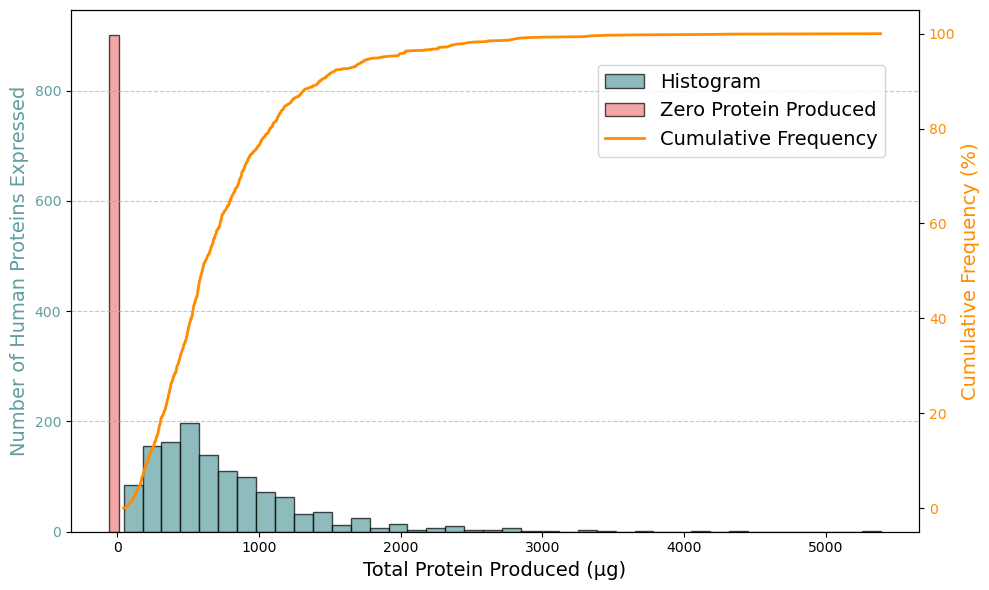

In [20]:
# Separate zeros and non-zeros
zeros = updated_protein_amounts == 0
non_zeros = updated_protein_amounts > 0

# Calculate cumulative frequency for non-zeros
sorted_non_zeros = np.sort(updated_protein_amounts[non_zeros])
updated_cumulative_freq = np.linspace(0, 100, len(sorted_non_zeros))
zero_percentage = (np.sum(zeros) / len(updated_protein_amounts)) * 100

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Histogram for non-zero values
color_hist = 'cadetblue'
n, bins, patches = ax1.hist(updated_protein_amounts[non_zeros], bins=40, edgecolor='black', alpha=0.7, color=color_hist, label='Histogram')

# Add a bar for zero counts
ax1.bar(bins[0] - (bins[1]-bins[0])/2, np.sum(zeros), width=(bins[1]-bins[0])/2, color='lightcoral', edgecolor='black', alpha=0.7, label='Zero Protein Produced')
ax1.set_xlabel("Total Protein Produced (µg)", fontsize=14)
ax1.set_ylabel("Number of Human Proteins Expressed", color=color_hist, fontsize=14)
ax1.tick_params(axis='y', labelcolor=color_hist)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Cumulative frequency
ax2 = ax1.twinx()
color_cumul = 'darkorange'
ax2.plot(sorted_non_zeros, updated_cumulative_freq, color=color_cumul, label='Cumulative Frequency', linewidth=2)
ax2.set_ylabel("Cumulative Frequency (%)", color=color_cumul, fontsize=14)
ax2.tick_params(axis='y', labelcolor=color_cumul)

# Adjust legend
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9), fontsize=14)

# Adjust layout
fig.tight_layout()

plt.savefig('results/Figure_1_option2.png')
plt.show()
